In [1]:
#*******************************************************************************************
 #
 #  File Name:  ClimatePy.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, ClimatePy.ipynb, uses Python and SQLAlchemy 
 #      to do a basic climate analysis and data exploration of a climate database
 #      through the use of SQLAlchemy ORM queries, Pandas, and Matplotlib.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  09/06/2023      Initial Development                     N. James George
 #
 #******************************************************************************************/

import PyFunctions as function
import PyLogFunctions as log_function
import PyLogSubRoutines as log_subroutine
import PySubRoutines as subroutine

import datetime as dt
import pandas as pd

In [2]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
CONSTANT_LOCAL_FILE_NAME \
    = 'ClimatePy.ipynb'

CONSTANT_SQL_LITE_DATABASE_FILE \
    = "sqlite:///Resources/hawaii.sqlite"


log_subroutine \
    .SetLogMode \
        (False)

log_subroutine \
    .SetDebugMode \
        (False)

log_subroutine \
    .SetImageMode \
        (False)


log_subroutine \
    .BeginProgramExecution \
        ('ClimatePy')

# Section 1: Reflect Tables into SQLAlchemy ORM

## **SQLAlchemy Engine**

In [5]:
# This line of code uses SQLAlchemy's create_engine function to connect to the Honolulu, Hawaii 
# climate database, hawaii.sqlite
engineSQLAlchemyEngineObject \
    = create_engine \
        (CONSTANT_SQL_LITE_DATABASE_FILE)


log_function \
    .DebugReturnObjectWriteObject \
        (engineSQLAlchemyEngineObject)

## **Database Reflection**

In [6]:
# This line of code reflects the tables in the Honolulu, Hawaii climate database into classes.
baseSQLAlchemyDeclarativeMetaObject \
    = automap_base()


log_function \
    .DebugReturnObjectWriteObject \
        (baseSQLAlchemyDeclarativeMetaObject)

In [7]:
# This line of code creates an SQLAlchemy inspection object, which delivers 
# runtime information about a wide variety of SQLAlchemy objects.
inspectorSQLAlchemyInspectorObject \
    = inspect \
        (engineSQLAlchemyEngineObject)


log_function \
    .DebugReturnObjectWriteObject \
        (inspectorSQLAlchemyInspectorObject)

## **Database Table Metadata**

In [8]:
# This line of code reflects the database tables.
baseSQLAlchemyDeclarativeMetaObject \
    .prepare \
        (engineSQLAlchemyEngineObject, 
         reflect \
             = True)

In [9]:
# This line of code views all of the classes that automap found.
baseSQLAlchemyDeclarativeMetaObject \
    .classes \
    .keys()

['measurement', 'station']

In [10]:
# This line of code saves a station reference in an SQLAlchemy Declarative MetaObject.
stationSQLAlchemyDeclarativeMetaObject \
    = baseSQLAlchemyDeclarativeMetaObject \
        .classes \
        .station


log_function \
    .DebugReturnObjectWriteObject \
        (stationSQLAlchemyDeclarativeMetaObject)

In [11]:
# This line of code saves a measurement reference in an SQLAlchemy Declarative MetaObject.
measurementDeclarativeMetaObject \
    = baseSQLAlchemyDeclarativeMetaObject \
        .classes \
        .measurement


log_function \
    .DebugReturnObjectWriteObject \
        (measurementDeclarativeMetaObject)

## **Create Session**

In [12]:
# This line of code links Python to the database by creating a SQLAlchemy session.
sessionSQLAlchemySessionObject \
    = Session \
        (engineSQLAlchemyEngineObject)


log_function \
    .DebugReturnObjectWriteObject \
        (sessionSQLAlchemySessionObject)

# Section 2: Exploratory Precipitation Analysis

## **Most Recent Date in the Dataset**

In [13]:
# This line of code finds and displays the most recent date 
# in the data set.
mostRecentDatesSQLAlchemyEngineRowObject \
    = sessionSQLAlchemySessionObject \
        .query \
            (measurementDeclarativeMetaObject \
                .date) \
                .order_by \
                    (measurementDeclarativeMetaObject \
                        .date \
                        .desc()) \
            .first()

mostRecentDateStringVariable \
    = mostRecentDatesSQLAlchemyEngineRowObject[0]


log_subroutine \
    .PrintAndLogWriteText \
        (f'The most recent date in the data set is {mostRecentDateStringVariable}.')

The most recent date in the data set is 2017-08-23.


In [14]:
# This line of code finds and displays the date one year prior 
# to the most recent date.
oneYearPriorToMostRecentDateStringVariable \
    = function \
        .ReturnDateFromOneYearPriorAsString \
            (mostRecentDateStringVariable)

log_subroutine \
    .PrintAndLogWriteText \
        ('The date one year prior to the most recent date in the data set is ' \
         + f'{oneYearPriorToMostRecentDateStringVariable}.')

The date one year prior to the most recent date in the data set is 2016-08-23.


## **Last Twelve Months of Precipitation Data**

In [15]:
# This line of code is a query that retrieves the last twelve months 
# of precipitation data.
precipitationDataListOfSQLAlchemyEngineRowObject \
    = sessionSQLAlchemySessionObject \
        .query \
            (measurementDeclarativeMetaObject \
                .date, 
             measurementDeclarativeMetaObject \
                .prcp) \
                .filter \
                    (measurementDeclarativeMetaObject.date >= oneYearPriorToMostRecentDateStringVariable) \
            .all()


log_function \
    .DebugReturnObjectWriteObject \
        (precipitationDataListOfSQLAlchemyEngineRowObject)

In [16]:
# These lines of code save the query results as a Pandas DataFrame
# and set the Date column to the index.
precipitationDataFrame \
    = pd \
        .DataFrame \
            (precipitationDataListOfSQLAlchemyEngineRowObject, 
             columns \
                 = ['Date','Precipitation'])

precipitationDataFrame \
    .dropna \
        (axis \
            = 0, 
         how \
            = 'any',
         inplace \
            = True)

precipitationDataFrame \
    .set_index \
        ('Date',  
         drop \
             = True, 
         append \
             = False,
         inplace \
             = True,
         verify_integrity \
             = False)


# This line of code sorts the precipitation DataFrame by date.
precipitationDataFrame \
    .sort_values \
        (by \
            = 'Date', 
         axis \
             = 0,
         inplace \
             = True)


log_function \
    .DebugReturnObjectWriteObject \
        (precipitationDataFrame)

## **Display Last Twelve Months of Precipitation Data**

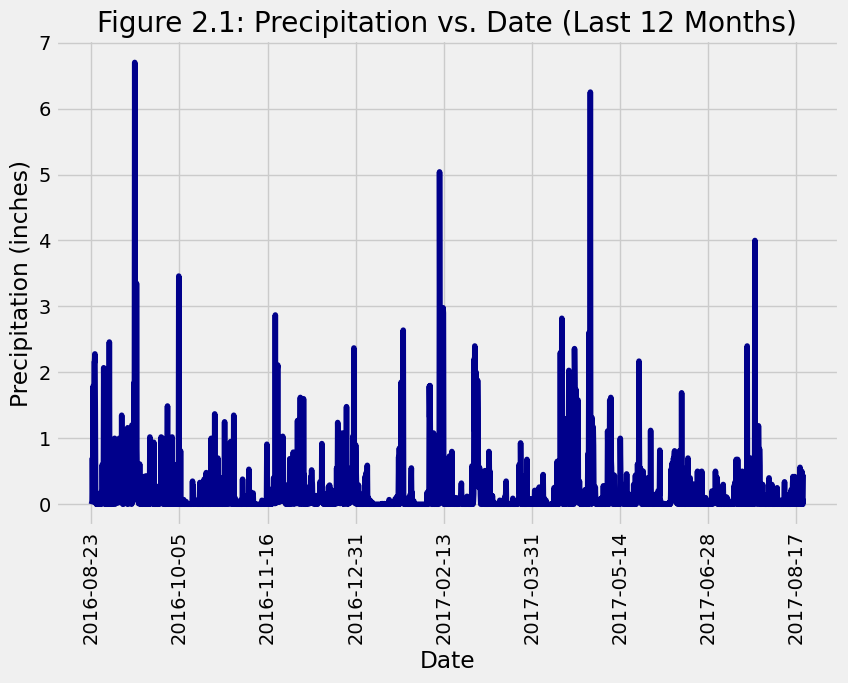

In [17]:
captionStringParameter \
    = 'Figure 2.1: Precipitation vs. Date (Last 12 Months)'


precipitationDataFrame \
    .plot \
        (title \
             = captionStringParameter, 
         xlabel \
             = 'Date',
         ylabel \
             = 'Precipitation (inches)', 
         rot \
             = 90,
         color \
             = 'darkblue',
         alpha \
             = 1.0,
         figsize \
             = (9,6),
         legend \
             = False)


log_subroutine \
    .SavePlotImage \
        (captionStringParameter)


plt \
    .show()

## **Precipitation Data Statistics**

In [18]:
function \
    .ReturnFormattedStatisticsDataFrameFromSeries \
        (precipitationDataFrame['Precipitation'],
         'Table 2.1: Honolulu, Hawaii Precipitation Statistics (1 Year)')

,Precipitation
Mean,0.1773
Median,0.0200
Mode,0.0000
Variance,0.2127
Std Dev,0.4612
SEM,0.0103
Minimum,0.00
25%,0.00
50%,0.02
75%,0.13


## **Display Precipitation Data Histogram**

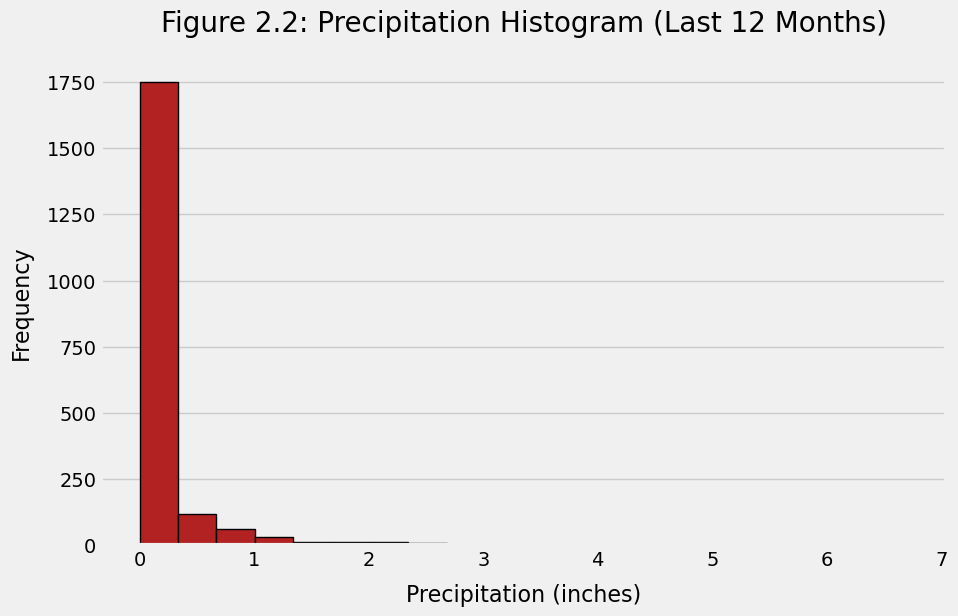

In [19]:
subroutine \
    .DisplayHistogramFromSeries \
        (precipitationDataFrame['Precipitation'],
         'Figure 2.2: Precipitation Histogram (Last 12 Months)',
         'Precipitation (inches)',
         'Frequency',
         colorStringParameter \
             = 'firebrick')

# Section 3: Exploratory Station Analysis

## **Total Number of Stations**

In [20]:
# This line of code designs a query to calculate the total number stations in the dataset.
totalNumberOfStationsInDataSetIntegerVariable \
    = sessionSQLAlchemySessionObject \
        .query \
            (stationSQLAlchemyDeclarativeMetaObject) \
                .group_by \
                    (stationSQLAlchemyDeclarativeMetaObject.station) \
            .count()


log_subroutine \
    .PrintAndLogWriteText \
        (f'The total number of stations in the dataset is {totalNumberOfStationsInDataSetIntegerVariable}.')

The total number of stations in the dataset is 9.


## **Most Active Stations**

In [21]:
# This line of code finds and lists the stations and observation counts in descending order.
mostActiveStationsListOfSQLAlchemyEngineRowObject \
    = sessionSQLAlchemySessionObject \
        .query \
            (measurementDeclarativeMetaObject \
                .station, 
             func \
                .count \
                    (measurementDeclarativeMetaObject \
                        .station)) \
                .group_by \
                    (measurementDeclarativeMetaObject \
                        .station) \
                .order_by \
                    (func \
                        .count \
                            (measurementDeclarativeMetaObject \
                                .station) \
                            .desc()) \
            .all()


log_function \
    .DebugReturnObjectWriteObject \
        (mostActiveStationsListOfSQLAlchemyEngineRowObject)

In [22]:
# This line of code assigns the id of most active station to a variable.
mostActiveStationNumberStringVariable \
    = mostActiveStationsListOfSQLAlchemyEngineRowObject[0][0]


log_subroutine \
    .PrintAndLogWriteText \
        (f'The station with the greatest number of observations is {mostActiveStationNumberStringVariable}.')

The station with the greatest number of observations is USC00519281.


## **Minimum, Maximum, and Average Temperatures**

In [23]:
# These lines of code filter using the most active station id from the previous query 
# and calculate the lowest, highest, and average temperatures.
minimumTemperatureFloatVariable \
    = sessionSQLAlchemySessionObject \
        .query \
            (func \
                .min \
                    (measurementDeclarativeMetaObject \
                        .tobs)) \
                .filter \
                    (measurementDeclarativeMetaObject.station == mostActiveStationNumberStringVariable) \
            .first()[0]

maximumTemperatureFloatVariable \
    = sessionSQLAlchemySessionObject \
        .query \
            (func \
                .max \
                    (measurementDeclarativeMetaObject \
                        .tobs)) \
                .filter \
                    (measurementDeclarativeMetaObject.station == mostActiveStationNumberStringVariable) \
            .first()[0]

averageTemperatureFloatVariable \
    = sessionSQLAlchemySessionObject \
        .query \
            (func \
                .avg \
                    (measurementDeclarativeMetaObject \
                        .tobs)) \
                .filter \
                    (measurementDeclarativeMetaObject.station == mostActiveStationNumberStringVariable) \
            .first()[0]


log_subroutine \
    .PrintAndLogWriteText \
        (f'These queries found the minimum ({minimumTemperatureFloatVariable}° F), ' \
         + f'maximum ({maximumTemperatureFloatVariable}° F), ' \
         + f'and average ({round(averageTemperatureFloatVariable, 1)}° F) temperatures.')

These queries found the minimum (54.0° F), maximum (85.0° F), and average (71.7° F) temperatures.


## **Last Twelve Months of Temperature Observation (TOBS) Data**

In [24]:
# This line of code filters by the most active station id and finds the previous 
# 12 months of temperature observation (TOBS) data.
resultsListOfSQLAlchemyEngineRowObject \
    = sessionSQLAlchemySessionObject \
        .query \
            (measurementDeclarativeMetaObject \
                .date, 
             measurementDeclarativeMetaObject \
                .tobs) \
                .filter \
                    (measurementDeclarativeMetaObject.date >= oneYearPriorToMostRecentDateStringVariable) \
                .filter \
                    (measurementDeclarativeMetaObject.date <= mostRecentDateStringVariable) \
                .filter \
                    (measurementDeclarativeMetaObject.station == mostActiveStationNumberStringVariable) \
            .all()


log_function \
    .DebugReturnObjectWriteObject \
        (resultsListOfSQLAlchemyEngineRowObject)

In [25]:
mostActiveStationTOBSDataFrame \
    = pd \
        .DataFrame \
            (resultsListOfSQLAlchemyEngineRowObject)


log_function \
    .DebugReturnObjectWriteObject \
        (mostActiveStationTOBSDataFrame)

## **Display Last Twelve Months of Temperature Observation (TOBS) Data**

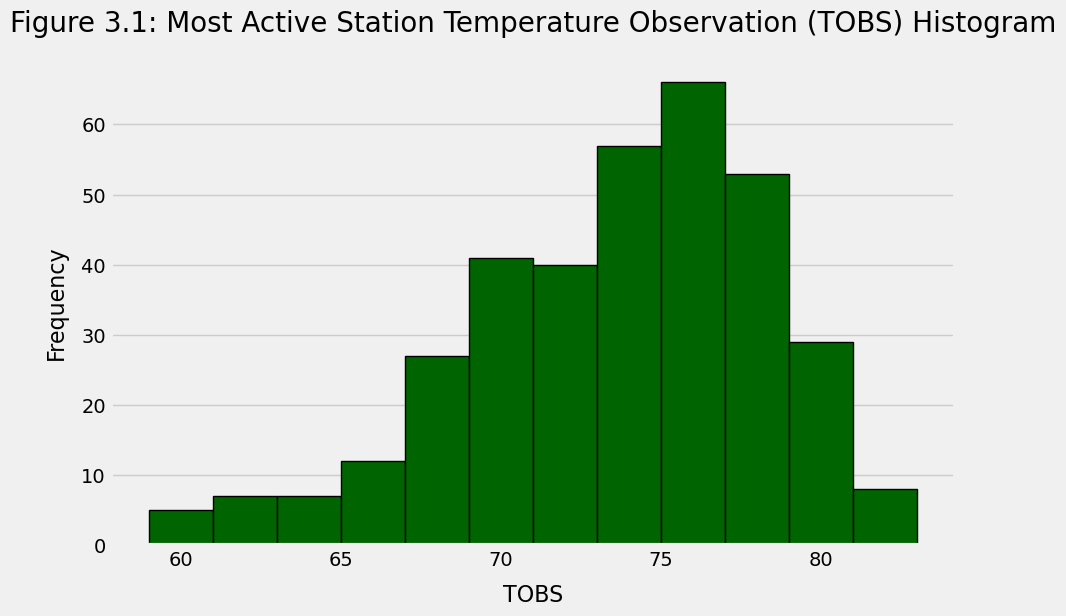

In [26]:
subroutine \
    .DisplayHistogramFromSeries \
        (mostActiveStationTOBSDataFrame['tobs'],
         'Figure 3.1: Most Active Station Temperature Observation (TOBS) Histogram',
         'TOBS',
         'Frequency', 
         binsIntegerParameter \
             = 12,
         colorStringParameter \
             = 'darkgreen')

# Section 4: Close Session

In [27]:
sessionSQLAlchemySessionObject \
    .close()

In [28]:
#log_subroutine \
#    .EndProgramExecution()